<a href="https://colab.research.google.com/github/Anaya666/Anaya666/blob/main/Lab02_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪LAB: Polynomial Regression as a First Approximation to Non-Linear Problems

In this lab, you will explore **Polynomial Regression** as a simple and intuitive extension of linear models that allows us to handle **non-linear** relationships between predictors and the target variable. While linear regression assumes a straight-line relationship, polynomial regression allows models to capture curves by introducing **non-linear transformations** of the original features. This a great starting point for thinking about **model complexity** and **non-linearity**, and will also be a first approximation to dealing with non-linear problems. Subsequent labs will concentrate on more advance models for this, such as **support vector machine** and **neural networks**.

---

**Collaboration Note**: This assignment is designed to support collaborative work. We encourage you to divide tasks among group members so that everyone can contribute meaningfully. Many components of the assignment can be approached in parallel or split logically across team members. Good coordination and thoughtful integration of your work will lead to a stronger final result.

---

In total, this lab assignment will be worth **100 points**.

---
**Submission notes**:

* Write down all group members' names, or at least the group name (if you have one and you previously provided it), in the first cell of the notebook.

* Verify that the notebook runs as expected and that all required outputs are included.


https://github.com/nylaup/DS4021-Labs-/tree/main

In [ ]:
NAME(s) =

## 1. Work with synthetic data (35 points)

### a. Generate the data
    
- Create a random variable `x` with at least 100 samples drawn from a Gaussian distribution (e.g., mean = 0, standard deviation = 1).

- Define a new variable `y` as a non-linear function of this `x`. You can add noise to make the task more realistic.

(*Hint*: Example of a non-linear function: `y = sin(x) + 0.3 * x² + noise`)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
x = np.random.normal(0, 0.1, 100)
y = np.sin(x) + 0.3 * x**2 + np.random.normal(0,0.1,100)


- Why do you think it is important to start with a synthetic dataset before using a real one? Elaborate your answer

To ensure the model works properly before it is used on real world data.

### b. Fit and Visualize Polynomial Regression

- First, fit a linear regression model using `LinearRegression` from `sklearn.linear_model`.  
  Plot your predictions over the scatterplot of your original `x` and `y` data.

- Then, apply a polynomial transformation to `x` using `PolynomialFeatures` from `sklearn.preprocessing`.  
  Try increasing the **degree** (e.g., 2, 3, 5, 7) and for each case:
  - Fit a new model on the transformed features.
  - Plot the predictions on top of the data.
  - Evaluate the model using metrics like MSE, MAE, and R².----evaluate on test set - need to do a train test split

**Important**: You should make use of pipelines to combine preprocessing and modeling steps cleanly.

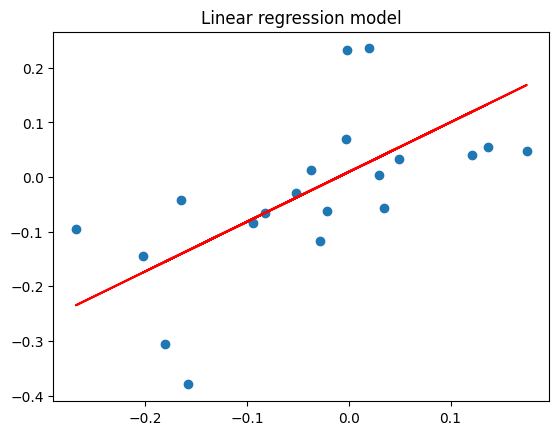

Linear Regression
MSE: 0.01315099445580257
MAE: 0.08979043690711333
R²: 0.3478242938611271


In [58]:
#Linear regression
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape x_train and x_test to be 2D arrays
x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)


# 3) Fit Linear Regression
lin_model = LinearRegression()
lin_model.fit(x_train_reshaped, y_train)
y_pred = lin_model.predict(x_test_reshaped)


#Plot
plt.scatter(x_test_reshaped, y_test)
plt.plot(x_test_reshaped, y_pred, color='red')
plt.title("Linear regression model")
plt.show()

# 4) Metrics
print("Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Polynomial Regression (degree 2)
MSE: 0.017359541181071476
MAE: 0.09767609728214668
R²: 0.139116736299984


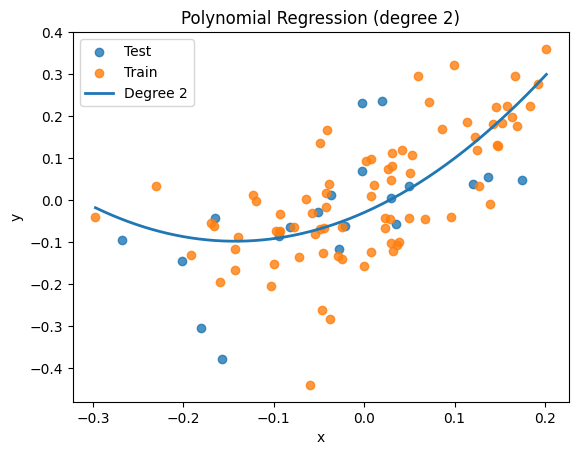


Polynomial Regression (degree 3)
MSE: 0.017093700071498488
MAE: 0.09811208381662605
R²: 0.15230015858330848


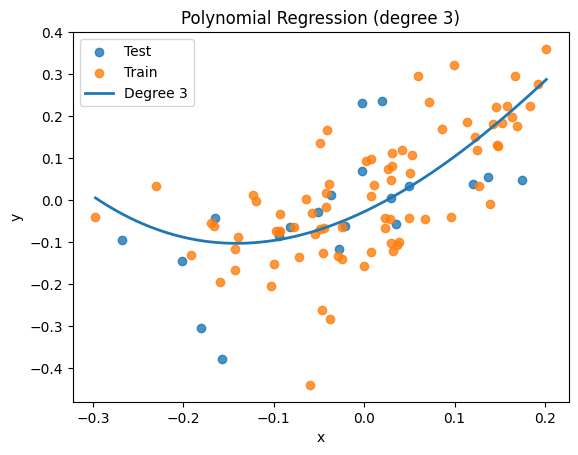


Polynomial Regression (degree 5)
MSE: 0.01825468904146629
MAE: 0.10480118103942168
R²: 0.09472513611235678


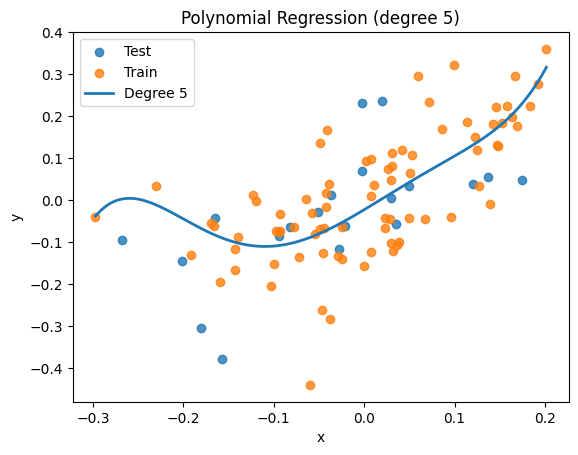


Polynomial Regression (degree 7)
MSE: 0.018856580728410684
MAE: 0.10611132929743827
R²: 0.06487650852215365


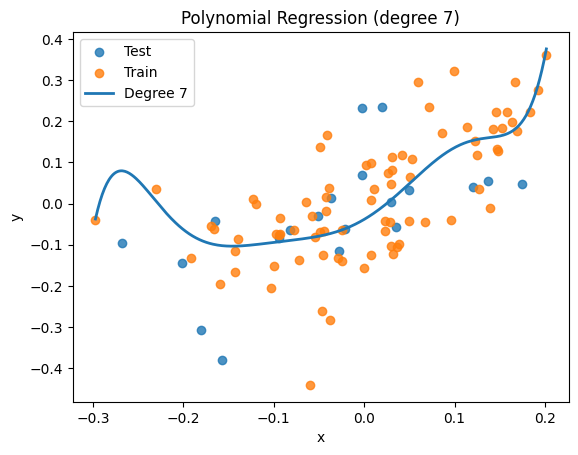

In [62]:
#polynomial regression
degrees = [2, 3, 5, 7]

# Smooth, sorted grid across the full x-range for clean lines
x_grid = np.linspace(x.min(), x.max(), 400).reshape(-1, 1)

for d in degrees:
    # Pipeline: PolynomialFeatures -> LinearRegression
    poly_model = make_pipeline(
        PolynomialFeatures(degree=d, include_bias=False),
        LinearRegression()
    )
    poly_model.fit(x_train_reshaped, y_train)

    # ---- Test-set evaluation ----
    y_pred_test = poly_model.predict(x_test_reshaped)
    print(f"\nPolynomial Regression (degree {d})")
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("R²:", r2_score(y_test, y_pred_test))

    # should plot both side by side
    plt.scatter(x_test_reshaped[:, 0], y_test, alpha=0.8, label="Test")
    plt.scatter(x_train_reshaped[:, 0], y_train, alpha=0.8, label="Train")

    # clean model curve (always plot against a sorted grid)
    y_grid = poly_model.predict(x_grid)
    plt.plot(x_grid[:, 0], y_grid, linewidth=2, label=f"Degree {d}")

    plt.legend()
    plt.title(f"Polynomial Regression (degree {d})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


Polynomial Regression (degree 2)
MSE: 0.017359541181071476
MAE: 0.09767609728214668
R²: 0.139116736299984


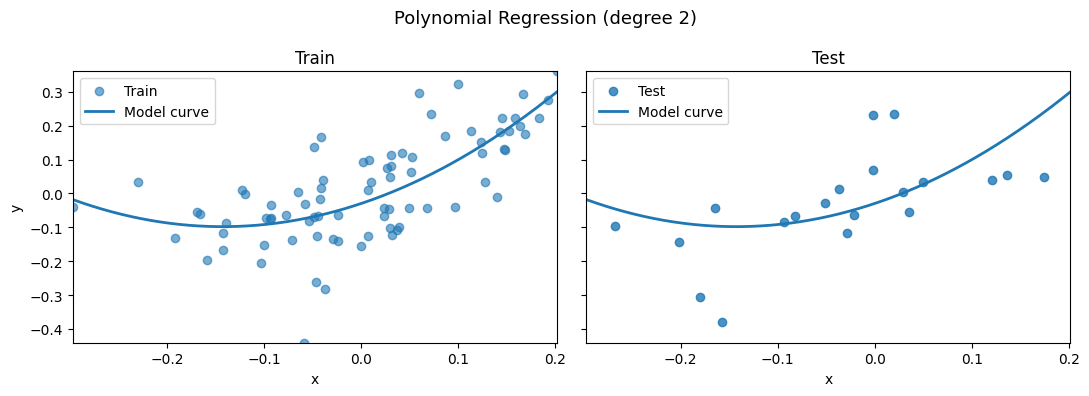


Polynomial Regression (degree 3)
MSE: 0.017093700071498488
MAE: 0.09811208381662605
R²: 0.15230015858330848


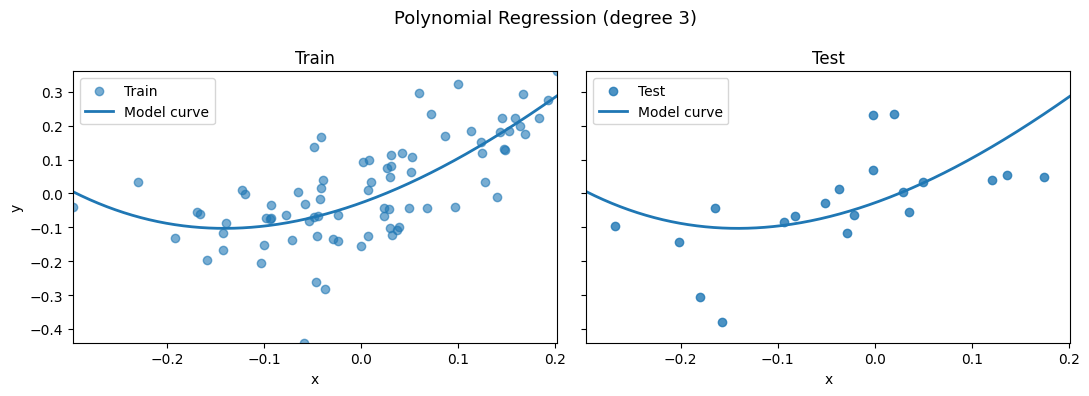


Polynomial Regression (degree 5)
MSE: 0.01825468904146629
MAE: 0.10480118103942168
R²: 0.09472513611235678


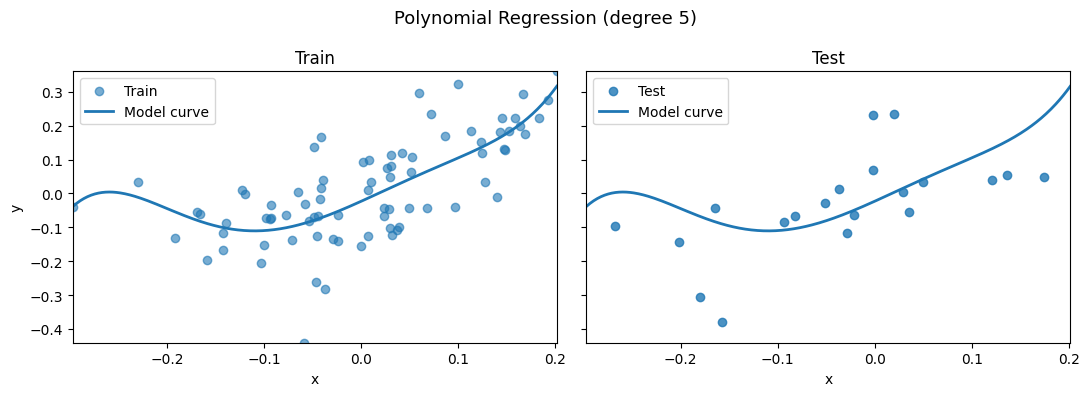


Polynomial Regression (degree 7)
MSE: 0.018856580728410684
MAE: 0.10611132929743827
R²: 0.06487650852215365


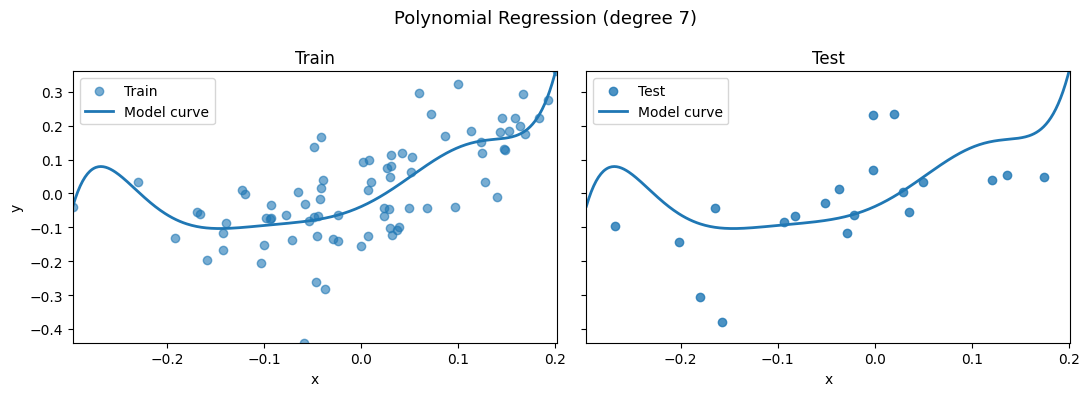

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

degrees = [2, 3, 5, 7]

# Smooth, sorted grid across the full x-range for clean model curves
x_grid = np.linspace(x.min(), x.max(), 400).reshape(-1, 1)

# Consistent axes across train/test for fair visual comparison
x_all = np.vstack([x_train_reshaped, x_test_reshaped])[:, 0]
y_all = np.concatenate([y_train, y_test])
xlim = (x_all.min(), x_all.max())
ylim = (y_all.min(), y_all.max())

for d in degrees:
    # Pipeline: PolynomialFeatures -> LinearRegression
    poly_model = make_pipeline(
        PolynomialFeatures(degree=d, include_bias=False),
        LinearRegression()
    )
    poly_model.fit(x_train_reshaped, y_train)

    # ---- Test-set evaluation ----
    y_pred_test = poly_model.predict(x_test_reshaped)
    print(f"\nPolynomial Regression (degree {d})")
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("R²:", r2_score(y_test, y_pred_test))

    # Precompute model curve
    y_grid = poly_model.predict(x_grid)

    # ---- Side-by-side plots: Train | Test ----
    fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharex=True, sharey=True)
    fig.suptitle(f"Polynomial Regression (degree {d})", fontsize=13)

    # Left: Train
    axes[0].scatter(x_train_reshaped[:, 0], y_train, alpha=0.6, label="Train")
    axes[0].plot(x_grid[:, 0], y_grid, linewidth=2, label="Model curve")
    axes[0].set_title("Train")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].set_xlim(xlim)
    axes[0].set_ylim(ylim)
    axes[0].legend()

    # Right: Test
    axes[1].scatter(x_test_reshaped[:, 0], y_test, alpha=0.8, label="Test")
    axes[1].plot(x_grid[:, 0], y_grid, linewidth=2, label="Model curve")
    axes[1].set_title("Test")
    axes[1].set_xlabel("x")
    axes[1].set_xlim(xlim)
    axes[1].set_ylim(ylim)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

- **Reflection**: What do you observe about model fit and complexity? Please, elaborate.

YOUR TEXT HERE

## 2. Application to Real Data

Now, you will apply polynomial regression to a real-world dataset that relates the **compressive strength of high-performance concrete** to various input features such as **cement**, **water**, and **aggregate content**. This dataset originates from a study exploring predictive modeling of concrete strength using neural networks. You instead will start wit hpolynomial regression, a simple approach but that will let you investigate how well it can capture the potentially non-linear relationship between input features and compressive strength.

You can find the dataset here: https://github.com/UVADS/DS-4021/blob/388a5fd8aad496172aafc694163c799b0bd6f5dd/datasets/Concrete_Data.xls, in addition to its metadata: https://github.com/UVADS/DS-4021/blob/388a5fd8aad496172aafc694163c799b0bd6f5dd/datasets/Concrete_Readme.txt.

Reference:

- I-Cheng Yeh, *Modeling of strength of high performance concrete using artificial neural networks*, Cement and Concrete Research, Vol. 28, No. 12, pp. 1797–1808 (1998).

### a. Load the data and create a training and test set. The test set should contain at least 20% of the observations.

In [ ]:
# [Your code here]

### b. For each input variable in the dataset, create a **scatterplot** against the outcome variable (`Compressive_Strength`).

In [ ]:
# [Your code here]

### c. Reflect: Do any variables appear to have a non-linear relationship with the output?  Why might this suggest the need for polynomial regression? Please elaborate on your answers.

YOUR TEXT HERE

### d. You have probably become convinced that modeling non-linear relationships is necessary in this dataset.  To do this, you’ll be using `PolynomialFeatures` to expand the input features.

But before moving on to modelling, you will first inspect how the number of features grows as you increase the degree of the expansion.

- Apply `PolynomialFeatures` to your input variables using degrees 1 through 5.
- For each degree, print the number of resulting features.


In [ ]:
# [Your code here]

### e. Discuss with your group and reflect:
    
- How does the number of features grow with increasing degree?
- What implications might this have for model training and interpretability?

Please elaborate on your answers.

YOUR TEXT HERE

In [ ]:
# [Your code here]

### f. You will fit a LASSO regression model on the expanded features. But before jumping into the implementation, discuss and reflect on the following with your group:

- Why are we using LASSO instead of plain linear regression?
- What are the benefits of regularization in this context?
- What preprocessing steps are necessary for LASSO to work properly (e.g., scaling)?

Please elaborate on your answers.

YOUR TEXT HERE

### g. Now, implement both steps together. That is:

- Apply `PolynomialFeatures` to expand the input features.
- Fit a **Lasso regression model** using two different combinations of:
  - Polynomial `degree`
  - LASSO `alpha` value

Evaluate and compare the models using metrics such as **MSE**, **MAE**, or **R²** on a validation set.

Again, you should make use of pipelines for this.

In [ ]:
# [Your code here]

### h. Discuss and reflect with your group:
- How should we go about finding the best combination of degree and alpha?
- What methods could we use to explore this space systematically?
- Is there a data-driven approach for this?

Please elaborate on your answers

YOUR TEXT HERE

### i. Now, expand your model evaluation to include 5 polynomial degrees (1 through 5) and 10 different alpha values for Lasso, spaced logarithmically (e.g., using `np.logspace`)

Now, do the following:

- For each combination of degree and alpha, compute the cross-validated error (e.g., MSE).
- Store the results and generate a plot that summarizes model performance.

In [ ]:
# [Your code here]

### j. Discuss and reflect with your group:

- Why did you choose this type of plot to summarize results?
- Can you think of a better or more informative visualization?

Please elaborate on your answers

### k. Using the most optimal model (based on your previous cross-validation results), generate predictions on the test set. In addition, create a plot comparing the predicted values against the observed values.

In [ ]:
# [Your code here]

### h. Identify the most important features from the LASSO model.

In [ ]:
# [Your code here]

Reflect:
- Do the important features make intuitive sense?
- Are any of them polynomial interaction terms? What might that tell you?

Please, elaborate on your answers.

YOUR TEXT HERE

## 3. Collaboration Reflection (5 points)

As a group, briefly reflect on the following (max 1–2 short paragraphs):

- How did the group dynamics work throughout the assignment?
- Were there any major disagreements or diverging approaches?
- How did you resolve conflicts or make final modeling decisions?
- What did you learn from each other during this project?

YOUR TEXT HERE